In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb


In [45]:
df = pd.read_csv("synthetic_lendingclub_10k(in).csv")
df.head()

,issue_d,earliest_cr_line,loan_status,target,loan_amnt,term_months,int_rate,installment,grade,sub_grade,...,revol_util,open_acc,total_acc,delinq_2yrs,inq_last_6mths,pub_rec,purpose,addr_state,application_type,credit_hist_months
0,10/18/2013 21:17,6/20/1995 21:17,Fully Paid,0,22600,36,11.64,746.76,C,C3,...,76.35,10,22,0,3,0,house,MD,Individual,219.940867
1,1/15/2016 22:44,4/22/2007 22:44,Fully Paid,0,24800,36,15.37,864.20,F,F1,...,68.56,4,6,2,3,0,moving,LA,Individual,104.796321
2,12/2/2016 10:45,6/27/1995 10:45,Fully Paid,0,19300,36,13.97,659.35,E,E1,...,79.07,12,18,1,0,0,credit_card,MO,Individual,257.194481
3,9/3/2016 13:20,6/15/2007 13:20,Fully Paid,0,13700,36,14.82,473.71,E,E4,...,66.67,5,9,1,2,0,moving,RI,Individual,110.643890
4,3/21/2016 22:40,7/10/1995 22:40,Fully Paid,0,6600,36,9.23,210.59,B,B2,...,50.61,17,21,0,2,0,debt_consolidation,AR,Individual,248.357424


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   issue_d              10000 non-null  object 
 1   earliest_cr_line     10000 non-null  object 
 2   loan_status          10000 non-null  object 
 3   target               10000 non-null  int64  
 4   loan_amnt            10000 non-null  int64  
 5   term_months          10000 non-null  int64  
 6   int_rate             10000 non-null  float64
 7   installment          10000 non-null  float64
 8   grade                10000 non-null  object 
 9   sub_grade            10000 non-null  object 
 10  sub_grade_ord        10000 non-null  int64  
 11  emp_length           10000 non-null  object 
 12  emp_length_years     10000 non-null  float64
 13  home_ownership       10000 non-null  object 
 14  annual_inc           10000 non-null  float64
 15  verification_status  10000 non-null  

In [47]:
df.isna().sum()

issue_d                0
earliest_cr_line       0
loan_status            0
target                 0
loan_amnt              0
term_months            0
int_rate               0
installment            0
grade                  0
sub_grade              0
sub_grade_ord          0
emp_length             0
emp_length_years       0
home_ownership         0
annual_inc             0
verification_status    0
dti                    0
revol_util             0
open_acc               0
total_acc              0
delinq_2yrs            0
inq_last_6mths         0
pub_rec                0
purpose                0
addr_state             0
application_type       0
credit_hist_months     0
dtype: int64

In [48]:
print("target:",df['target'].unique())
print("loan status:",df['loan_status'].unique())
print("grade:",df['grade'].unique())
print("sub grade:",df['sub_grade'].unique())
print("emp length:",df['emp_length'].unique())
print("home ownership:",df['home_ownership'].unique())
print("verification_status:",df['verification_status'].unique())
print("purpose:",df['purpose'].unique())
print("application_type:",df['application_type'].unique())

target: [0 1]
loan status: ['Fully Paid' 'Charged Off']
grade: ['C' 'F' 'E' 'B' 'A' 'G' 'D']
sub grade: ['C3' 'F1' 'E1' 'E4' 'B2' 'A1' 'G3' 'C4' 'A2' 'D3' 'E3' 'D4' 'D5' 'D1'
 'E5' 'C1' 'F2' 'G2' 'F5' 'A5' 'G1' 'E2' 'B1' 'A4' 'G5' 'B3' 'F4' 'G4'
 'B4' 'B5' 'A3' 'D2' 'F3' 'C2' 'C5']
emp length: ['10+ years' '6 years' '7 years' '1 years' '9 years' '2 years' '4 years'
 '3 years' '5 years' '8 years' '< 1 year']
home ownership: ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
verification_status: ['Verified' 'Not Verified' 'Source Verified']
purpose: ['house' 'moving' 'credit_card' 'debt_consolidation' 'vacation' 'car'
 'home_improvement' 'medical' 'other' 'renewable_energy' 'small_business'
 'major_purchase' 'educational' 'wedding']
application_type: ['Individual' 'Joint App']


In [49]:
ordinal_list = ["grade", "home_ownership", "emp_length"]
oneH_list    = ["loan_status", "application_type"]
label_list   = ["sub_grade", "purpose"]

In [50]:
ordinal_enc = OrdinalEncoder()
lable_enc = LabelEncoder()    
oneH_enc = OneHotEncoder()

df[ordinal_list] = ordinal_enc.fit_transform(df[ordinal_list])

label_enc = LabelEncoder()
for col in label_list:
    df[col] = label_enc.fit_transform(df[col].astype(str))

oneH_enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

oneH_array = oneH_enc.fit_transform(df[oneH_list])
oneH_cols = oneH_enc.get_feature_names_out(oneH_list)

oneH_df = pd.DataFrame(oneH_array, columns=oneH_cols, index=df.index)

df_enc = df.drop(columns=oneH_list)
df = pd.concat([df_enc, oneH_df], axis=1)

In [51]:
leak_cols = [c for c in df.columns if c.startswith('loan_status_')]
df = df.drop(columns=leak_cols)

In [52]:
df = df.select_dtypes(include=["number"])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   target                       10000 non-null  int64  
 1   loan_amnt                    10000 non-null  int64  
 2   term_months                  10000 non-null  int64  
 3   int_rate                     10000 non-null  float64
 4   installment                  10000 non-null  float64
 5   grade                        10000 non-null  float64
 6   sub_grade                    10000 non-null  int64  
 7   sub_grade_ord                10000 non-null  int64  
 8   emp_length                   10000 non-null  float64
 9   emp_length_years             10000 non-null  float64
 10  home_ownership               10000 non-null  float64
 11  annual_inc                   10000 non-null  float64
 12  dti                          10000 non-null  float64
 13  revol_util       

In [54]:
df = df.select_dtypes(exclude=["object"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   target                       10000 non-null  int64  
 1   loan_amnt                    10000 non-null  int64  
 2   term_months                  10000 non-null  int64  
 3   int_rate                     10000 non-null  float64
 4   installment                  10000 non-null  float64
 5   grade                        10000 non-null  float64
 6   sub_grade                    10000 non-null  int64  
 7   sub_grade_ord                10000 non-null  int64  
 8   emp_length                   10000 non-null  float64
 9   emp_length_years             10000 non-null  float64
 10  home_ownership               10000 non-null  float64
 11  annual_inc                   10000 non-null  float64
 12  dti                          10000 non-null  float64
 13  revol_util       

In [67]:
df["target"].value_counts()

target
0    9309
1     691
Name: count, dtype: int64

In [55]:
df.iloc[:, :10].head()

,target,loan_amnt,term_months,int_rate,installment,grade,sub_grade,sub_grade_ord,emp_length,emp_length_years
0,0,22600,36,11.64,746.76,2.0,12,12,1.0,10.0
1,0,24800,36,15.37,864.20,5.0,25,25,6.0,6.0
2,0,19300,36,13.97,659.35,4.0,20,20,7.0,7.0
3,0,13700,36,14.82,473.71,4.0,23,23,0.0,1.0
4,0,6600,36,9.23,210.59,1.0,6,6,9.0,9.0


In [56]:
df.iloc[:, 10:].head()

,home_ownership,annual_inc,dti,revol_util,open_acc,total_acc,delinq_2yrs,inq_last_6mths,pub_rec,purpose,credit_hist_months,application_type_Individual,application_type_Joint App
0,3.0,26003.22,23.77,76.35,10,22,0,3,0,5,219.940867,1.0,0.0
1,0.0,39276.27,23.90,68.56,4,6,2,3,0,8,104.796321,1.0,0.0
2,2.0,59318.05,25.85,79.07,12,18,1,0,0,1,257.194481,1.0,0.0
3,0.0,70686.74,25.66,66.67,5,9,1,2,0,8,110.643890,1.0,0.0
4,3.0,42008.82,16.15,50.61,17,21,0,2,0,2,248.357424,1.0,0.0


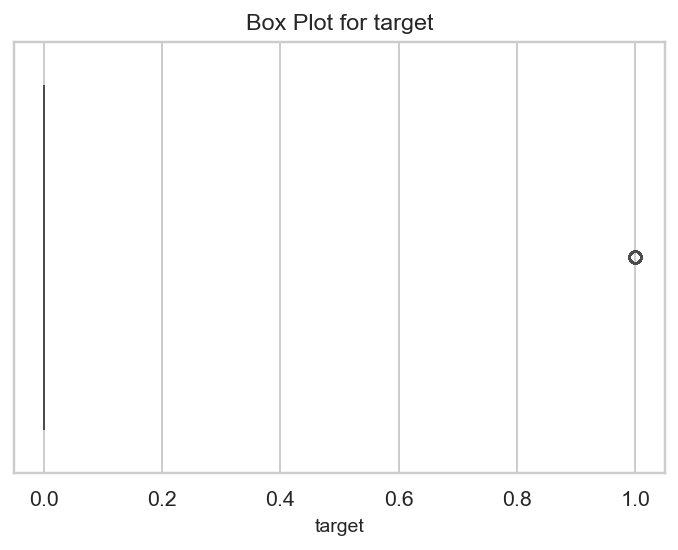

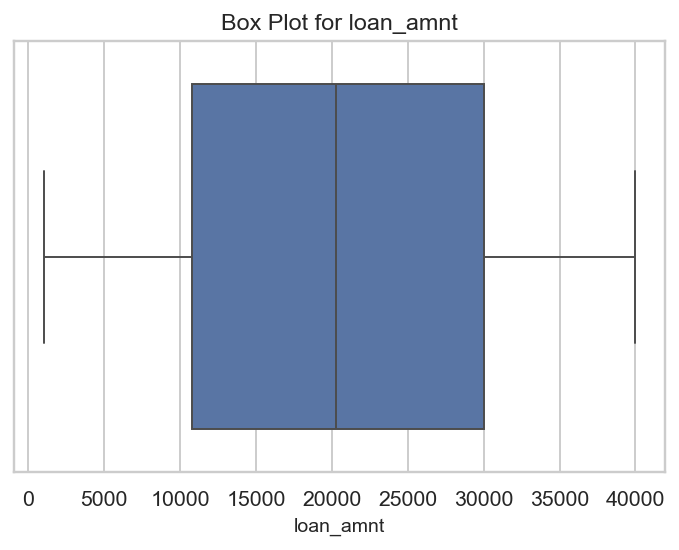

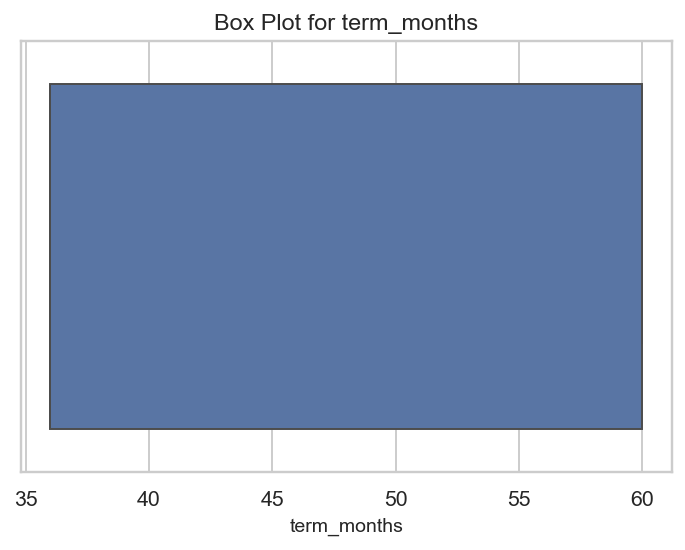

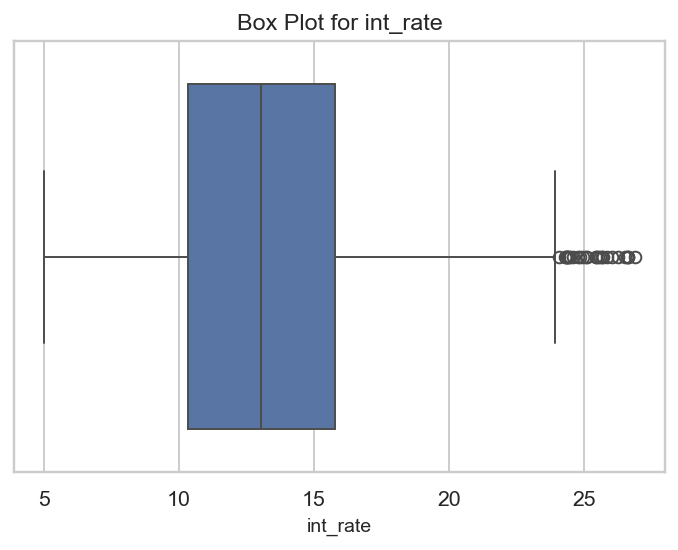

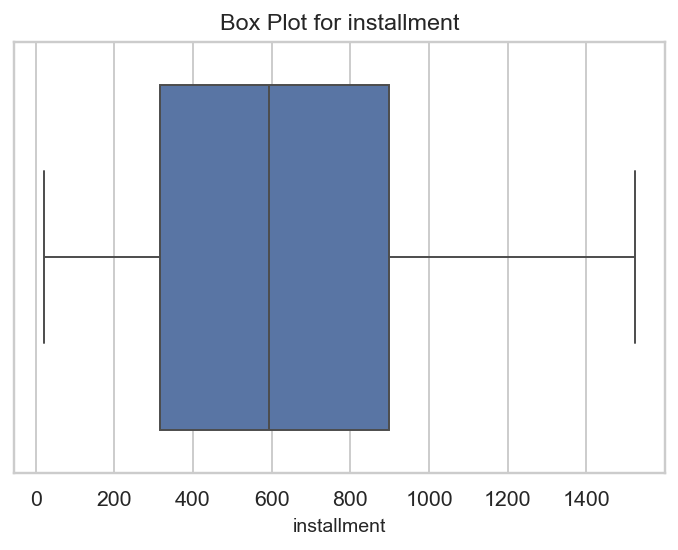

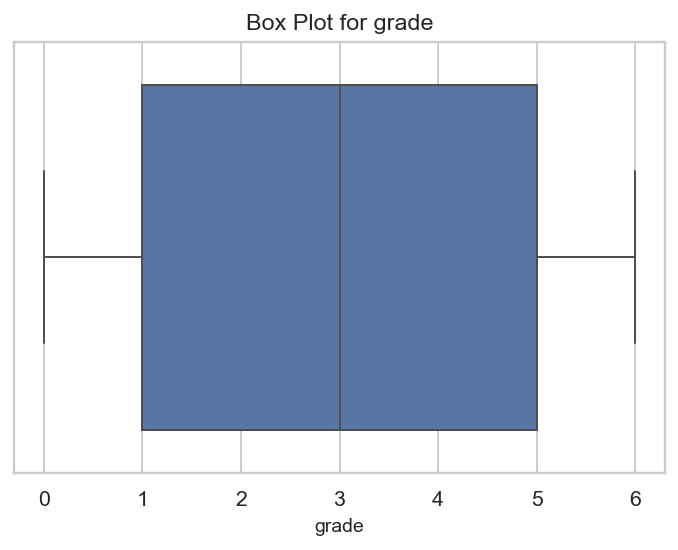

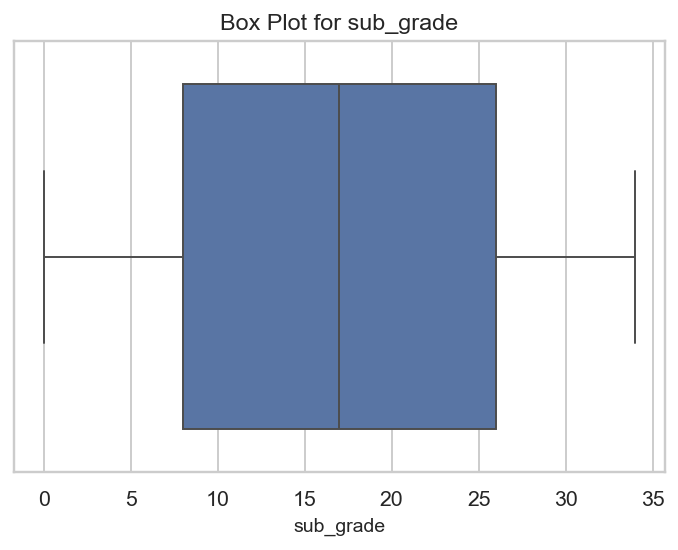

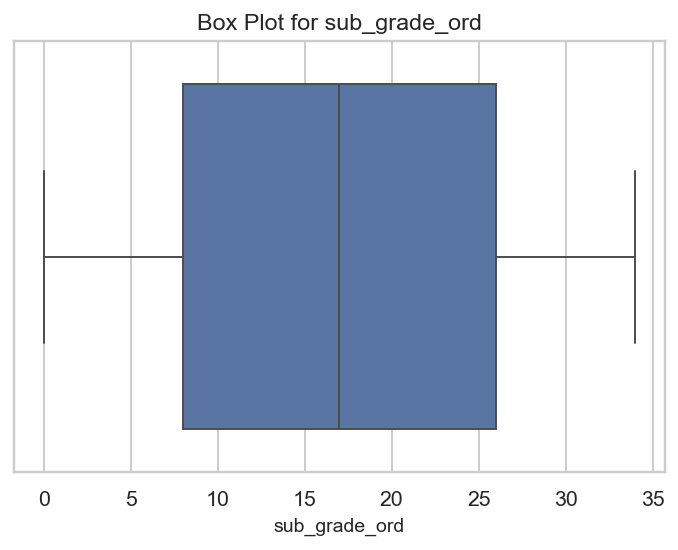

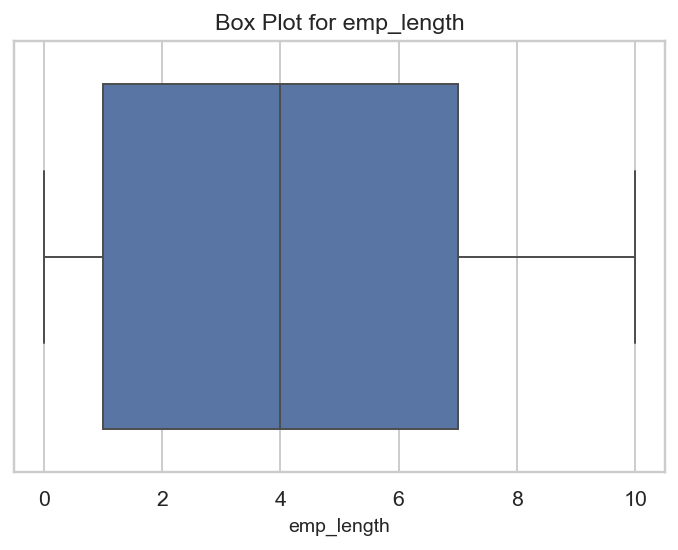

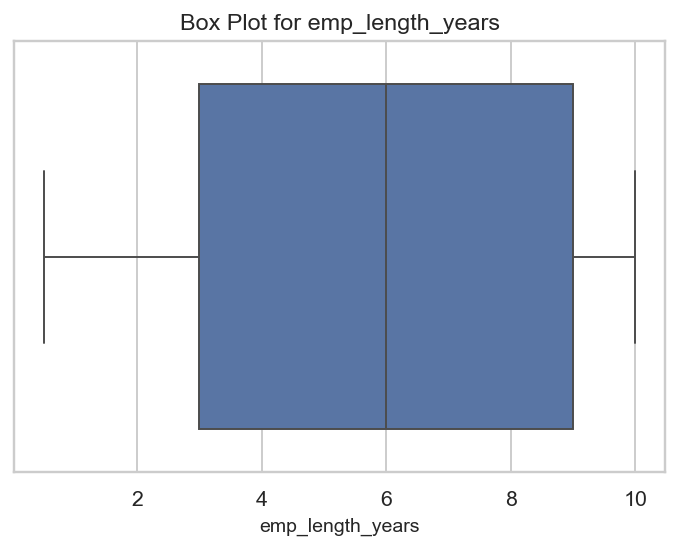

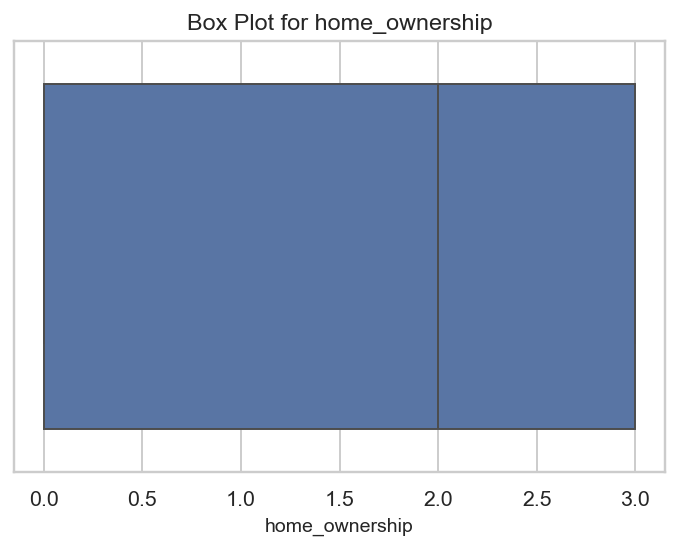

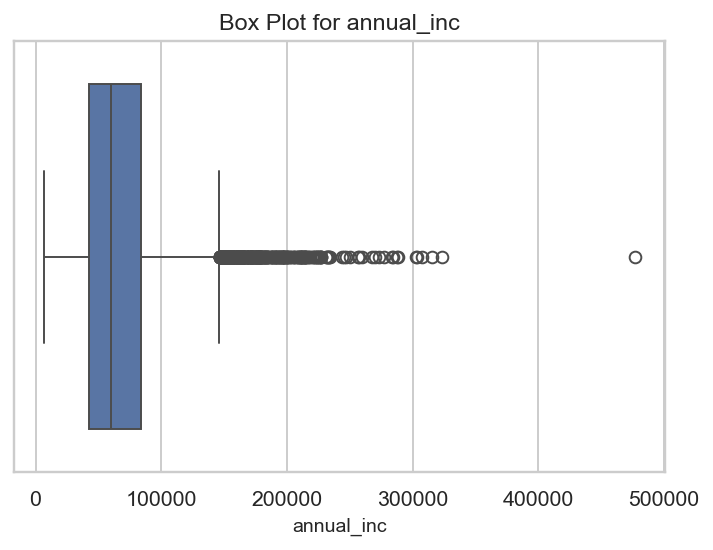

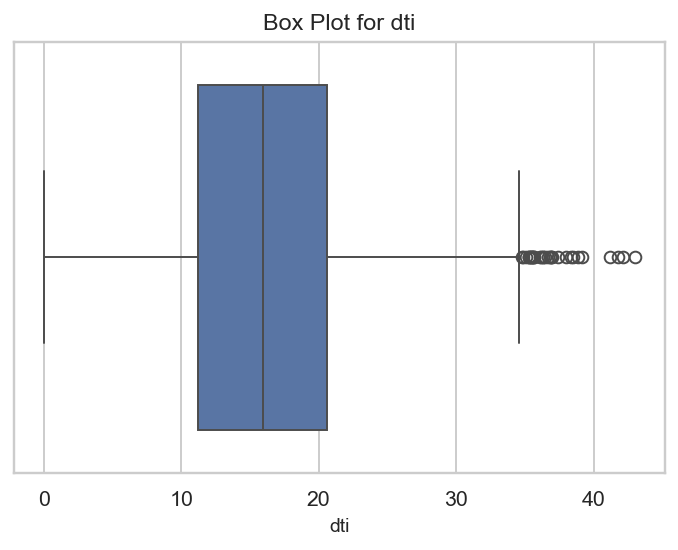

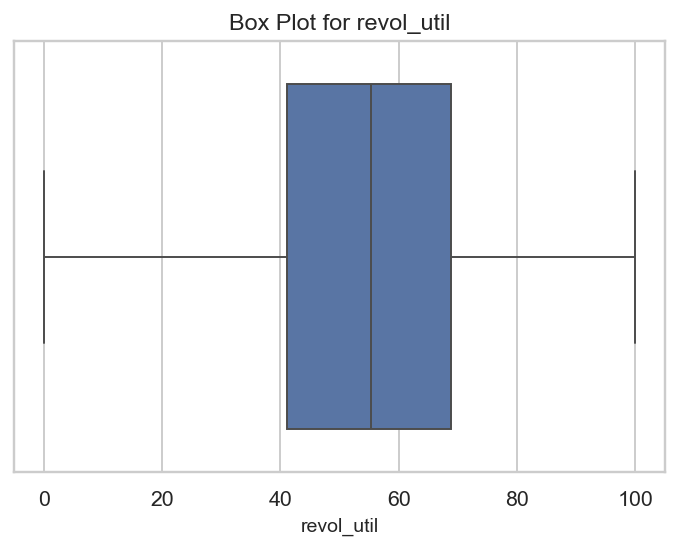

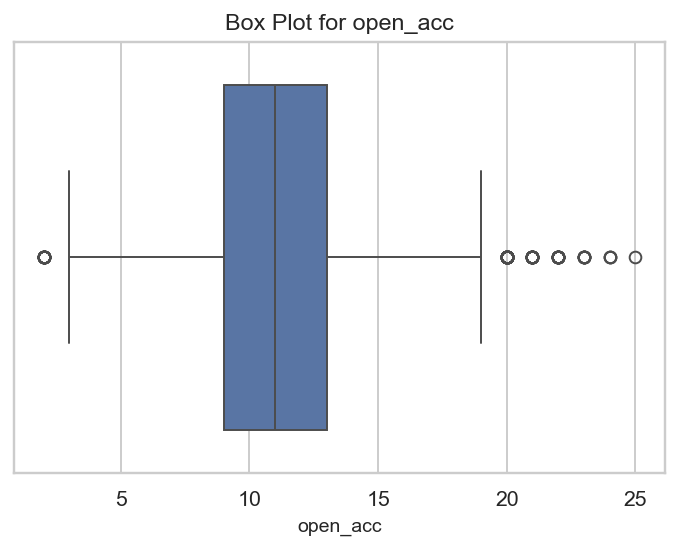

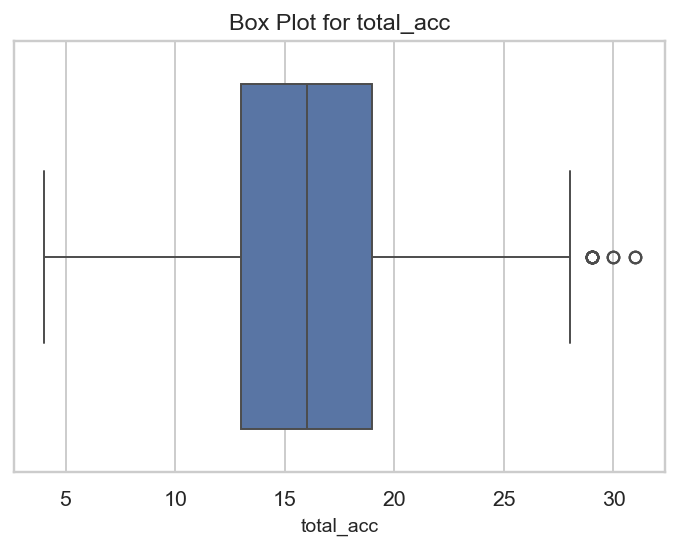

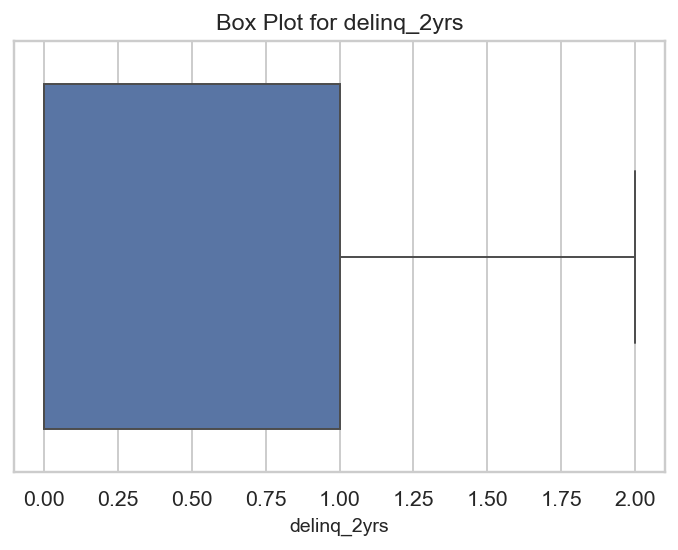

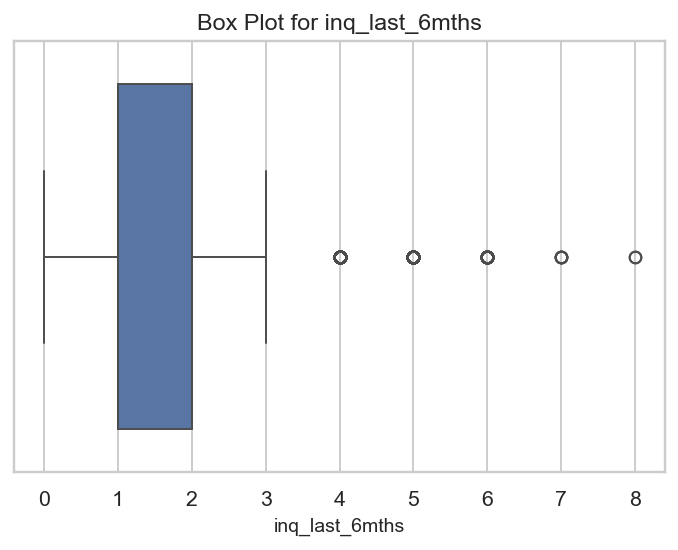

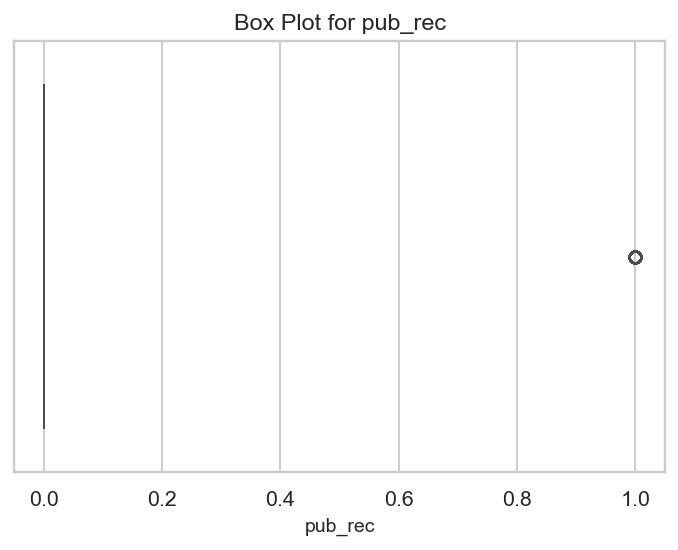

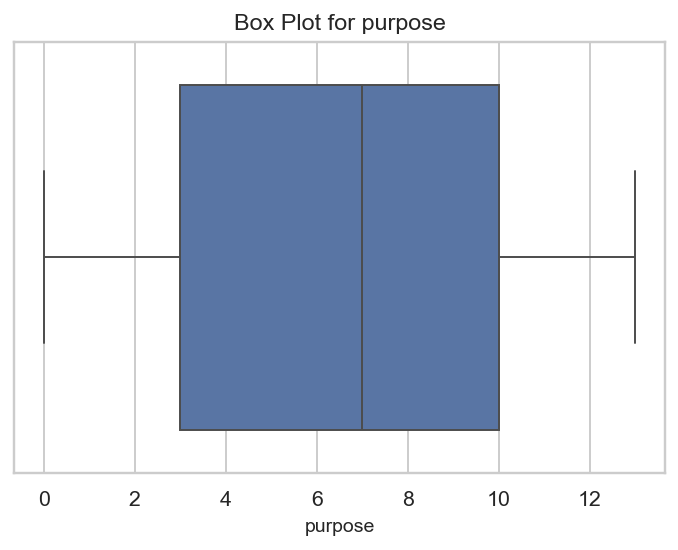

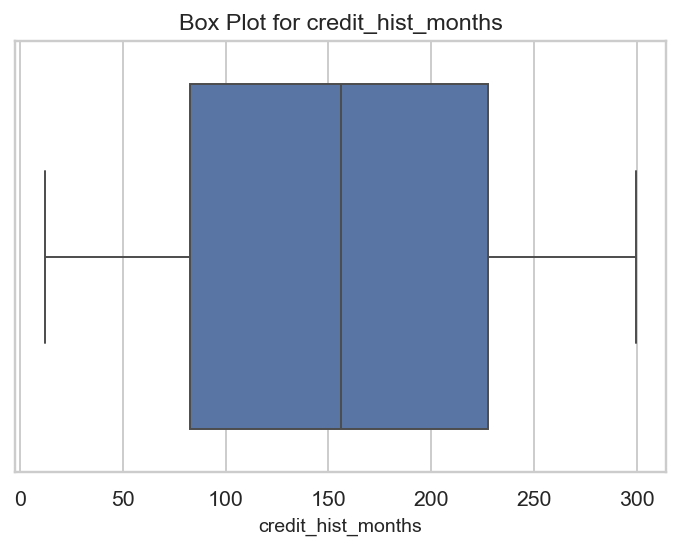

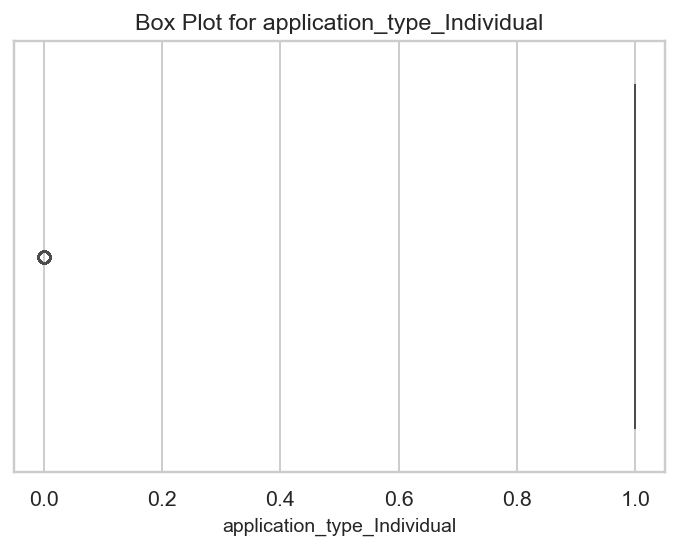

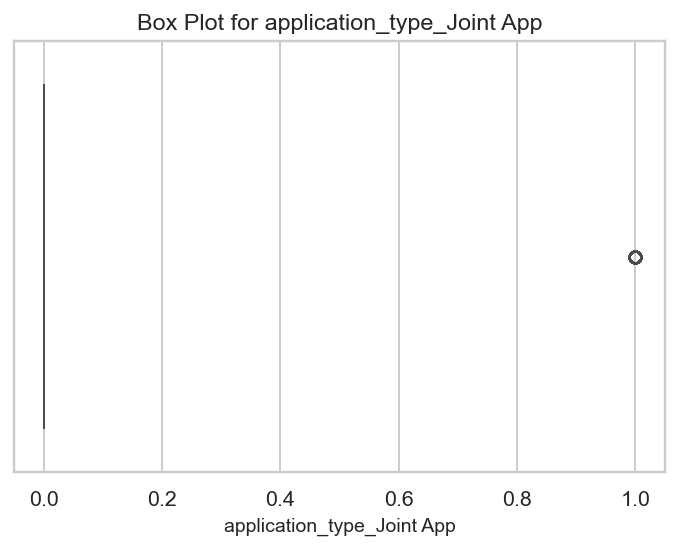

In [57]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot for {col}")
    plt.show()


In [58]:
leak_cols = [c for c in df.columns if c.startswith('loan_status_')]
df = df.drop(columns=leak_cols)

x = df.drop("target", axis=1)
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [59]:
scaler = RobustScaler()
scaler.fit(x_train)

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)


In [ ]:
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    tree_method="hist"
)

In [61]:
from sklearn.metrics import accuracy_score
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.929


C:\Users\Tejas.Matale\AppData\Local\Temp\ipykernel_21248\674560459.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=outcome_counts, x="Outcome", y="Count", palette=["#4CAF50","#F44336"])


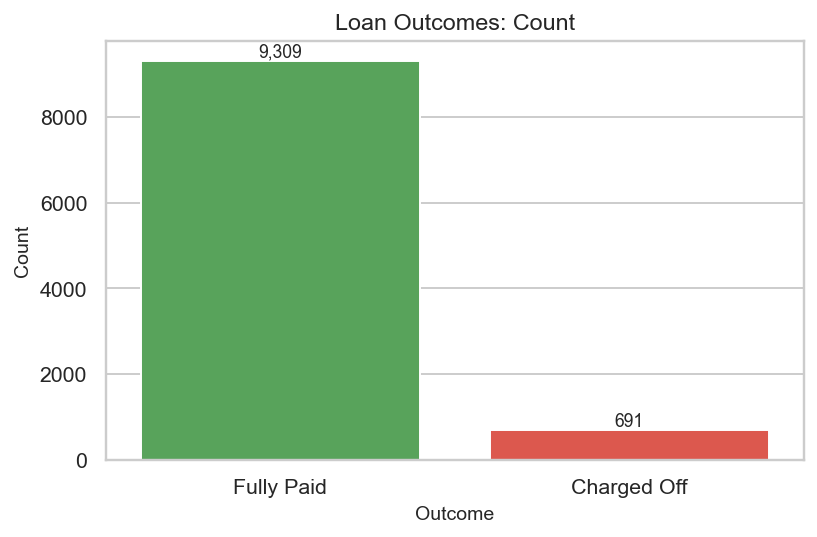

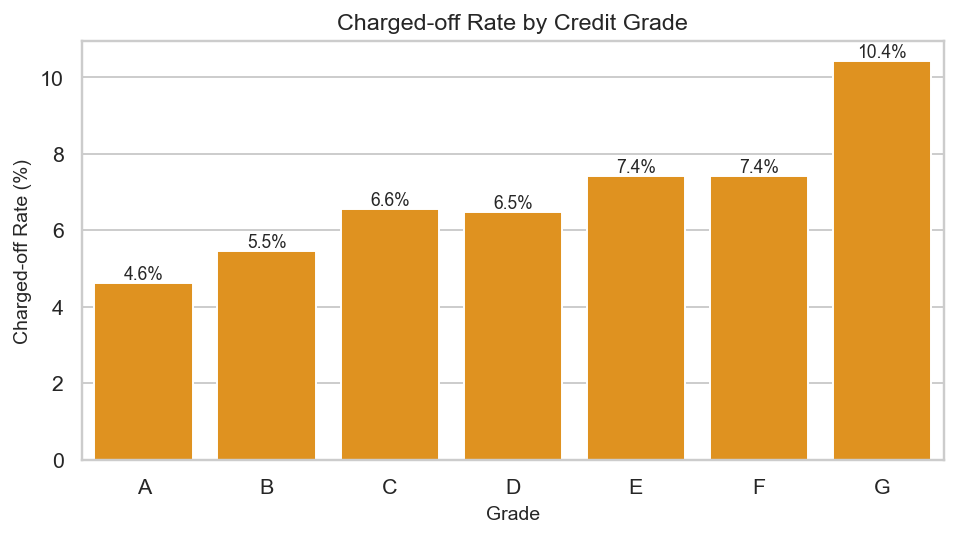

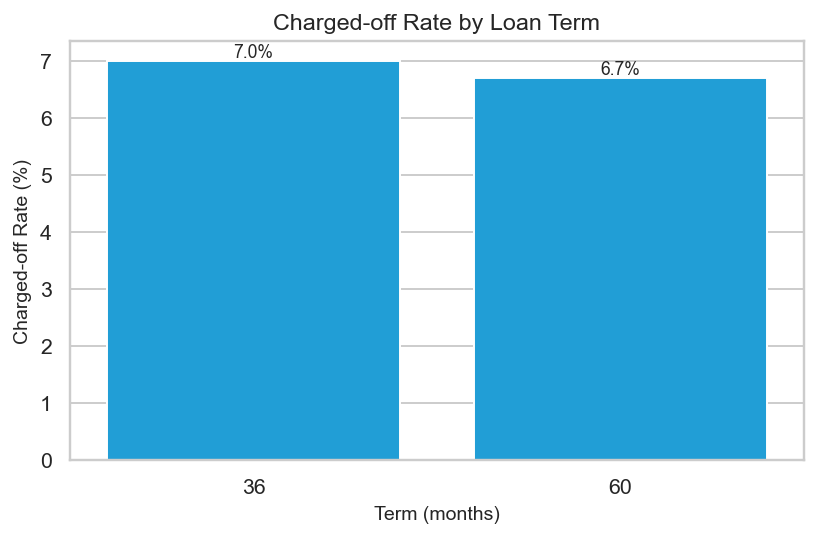

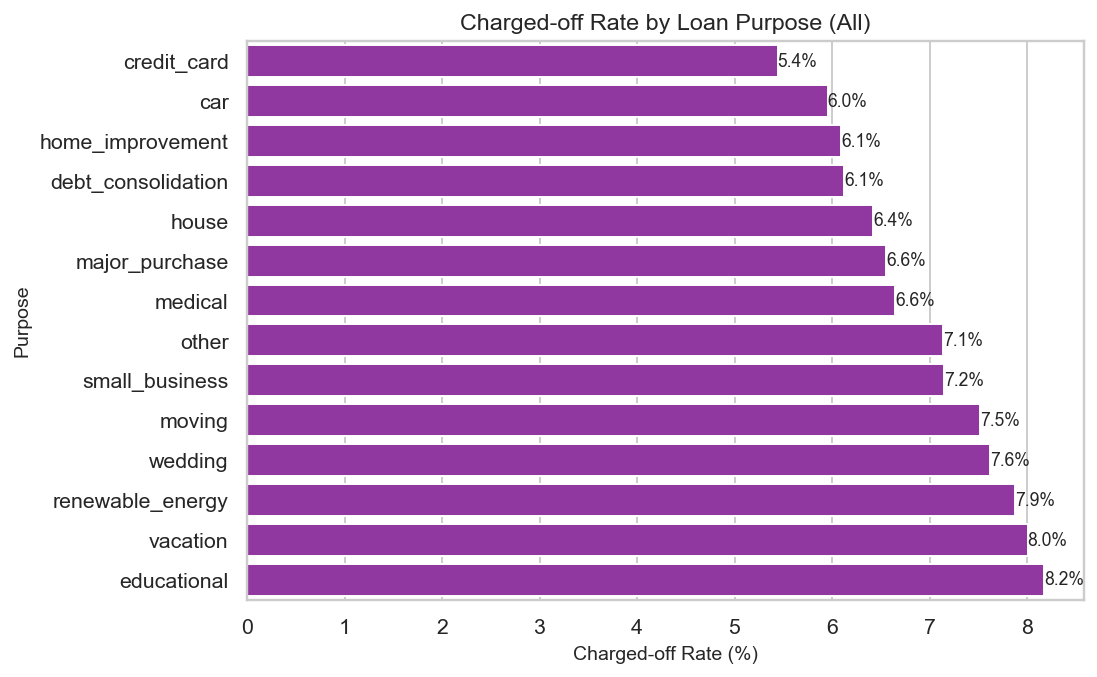

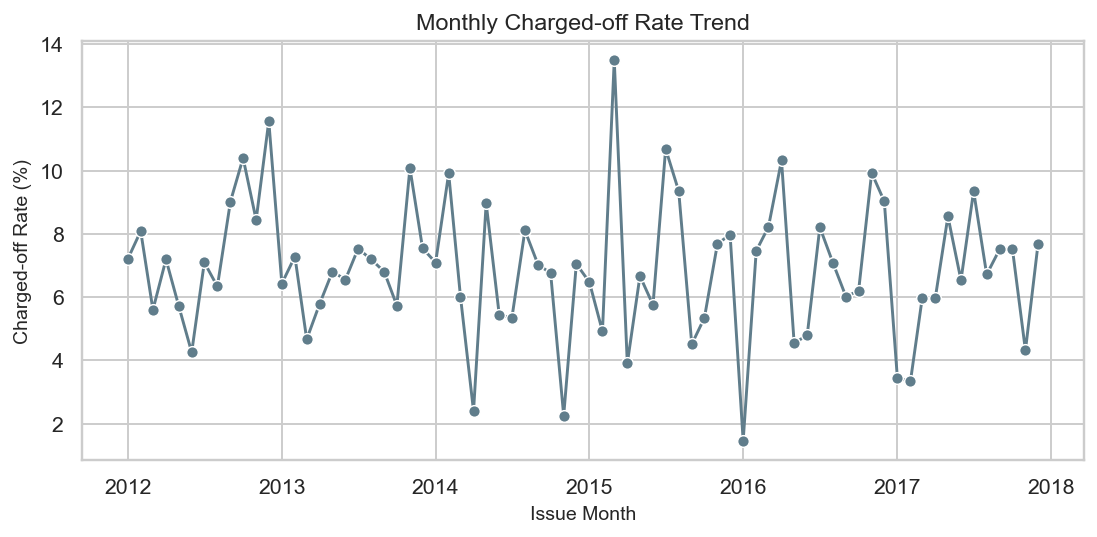

In [66]:

# ===== ONE-CELL PLOTTING: outcomes, by grade/term/purpose, monthly trend =====
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Reload original data so plots aren't affected by prior preprocessing ---
df = pd.read_csv("synthetic_lendingclub_10k(in).csv")

# --- Styling (your style) ---
sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 140
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 10

# --- Helper (kept for reference; not strictly required in all plots) ---
def charged_off_rate(g):
    total = g.shape[0]
    chg  = (g["target"] == 1).sum()
    return 100 * chg / total if total else np.nan

# ======================
# 1) Overall loan outcomes (count)
# ======================
outcome_map = {0: "Fully Paid", 1: "Charged Off"}
outcome_counts = (
    df["target"].map(outcome_map)
      .value_counts()
      .rename_axis("Outcome")
      .reset_index(name="Count")
)

plt.figure(figsize=(6,4))
ax = sns.barplot(data=outcome_counts, x="Outcome", y="Count", palette=["#4CAF50","#F44336"])
ax.set_title("Loan Outcomes: Count")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

# ======================
# 2) Charged-off rate by grade (A→G), robust to missing categories
# ======================
if "grade" in df.columns:
    grade_order = ["A","B","C","D","E","F","G"]
    grade_stats = (
        df.groupby("grade")["target"]
          .agg(total="count", charged_off=lambda s: (s==1).sum())
          .assign(charged_off_rate_pct=lambda x: x["charged_off"]/x["total"]*100)
          .reindex(grade_order)                                     # keep canonical A..G order
          .fillna({"total": 0, "charged_off": 0, "charged_off_rate_pct": 0})  # avoid dropped bars
    )

    plt.figure(figsize=(7,4))
    ax = sns.barplot(x=grade_stats.index, y=grade_stats["charged_off_rate_pct"], color="#FF9800")
    ax.set_xlabel("Grade")
    ax.set_ylabel("Charged-off Rate (%)")
    ax.set_title("Charged-off Rate by Credit Grade")
    for i, v in enumerate(grade_stats["charged_off_rate_pct"]):
        ax.annotate(f"{v:.1f}%", (i, v), ha="center", va="bottom", fontsize=9)
    plt.tight_layout()
    plt.show()

# ======================
# 3) Charged-off rate by term (36 vs 60)
# ======================
term_col = "term_months" if "term_months" in df.columns else ("term" if "term" in df.columns else None)
if term_col is not None:
    term_stats = (
        df.groupby(term_col)["target"]
          .agg(total="count", charged_off=lambda s: (s==1).sum())
          .assign(charged_off_rate_pct=lambda x: x["charged_off"]/x["total"]*100)
          .reset_index()
          .sort_values(term_col)
    )

    plt.figure(figsize=(6,4))
    ax = sns.barplot(x=term_stats[term_col].astype(str), y=term_stats["charged_off_rate_pct"], color="#03A9F4")
    ax.set_xlabel("Term (months)")
    ax.set_ylabel("Charged-off Rate (%)")
    ax.set_title("Charged-off Rate by Loan Term")
    for i, v in enumerate(term_stats["charged_off_rate_pct"]):
        ax.annotate(f"{v:.1f}%", (i, v), ha="center", va="bottom", fontsize=9)
    plt.tight_layout()
    plt.show()

# ======================
# 4) Charged-off rate by purpose (ALL purposes)
# ======================
if "purpose" in df.columns:
    purpose_stats = (
        df.groupby("purpose")["target"]
          .agg(total="count", charged_off=lambda s: (s==1).sum())
          .assign(charged_off_rate_pct=lambda x: x["charged_off"]/x["total"]*100)
          .reset_index()
          .sort_values("charged_off_rate_pct")   # sort by rate; change to "total" for volume
    )

    plt.figure(figsize=(8, max(5, 0.3*len(purpose_stats))))
    ax = sns.barplot(y=purpose_stats["purpose"], x=purpose_stats["charged_off_rate_pct"], color="#9C27B0")
    ax.set_xlabel("Charged-off Rate (%)")
    ax.set_ylabel("Purpose")
    ax.set_title("Charged-off Rate by Loan Purpose (All)")
    for p, v in zip(ax.patches, purpose_stats["charged_off_rate_pct"]):
        ax.annotate(f"{v:.1f}%", (p.get_width(), p.get_y()+p.get_height()/2),
                    ha="left", va="center", fontsize=9)
    plt.tight_layout()
    plt.show()

# ======================
# 5) Monthly charged-off rate trend (parse & sort by issue date)
# ======================
if "issue_d" in df.columns:
    tmp = df.copy()
    tmp["issue_d"] = pd.to_datetime(tmp["issue_d"], errors="coerce")
    monthly = (
        tmp.dropna(subset=["issue_d"])
           .assign(issue_month=lambda t: t["issue_d"].dt.to_period("M").dt.to_timestamp())
           .groupby("issue_month")["target"]
           .agg(total="count", charged_off=lambda s: (s==1).sum())
           .assign(charged_off_rate_pct=lambda x: x["charged_off"]/x["total"]*100)
           .reset_index()
           .sort_values("issue_month")  # ensure chronological order
    )

    if not monthly.empty:
        plt.figure(figsize=(8,4))
        ax = sns.lineplot(data=monthly, x="issue_month", y="charged_off_rate_pct",
                          marker="o", color="#607D8B")
        ax.set_xlabel("Issue Month")
        ax.set_ylabel("Charged-off Rate (%)")
        ax.set_title("Monthly Charged-off Rate Trend")
        plt.tight_layout()
        plt.show()


## performed BalancedBaggingClassifier Sampling to handle the imbalance of the data

In [86]:
from imblearn.ensemble import BalancedBaggingClassifier
model = xgb.XGBClassifier(
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    tree_method="hist"
)

balanced_bagging_classifier = BalancedBaggingClassifier(

    model,
    sampling_strategy='majority',
    replacement=False,
    random_state=42)

balanced_bagging_classifier.fit(X_train_scaled,y_train)

y_pred = balanced_bagging_classifier.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7663333333333333


# SMOTE

In [92]:
from imblearn.over_sampling import SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
smote = SMOTE(sampling_strategy="auto", random_state=42)
x_train_resampled,y_train_resampled = smote.fit_resample(X_train_scaled,y_train)
balanced_bagging_classifier.fit(X_train_scaled,y_train)

print("Class distribution after SMOTE:",y_train_resampled.value_counts())


Class distribution before SMOTE: target
0    6514
1     486
Name: count, dtype: int64
Class distribution after SMOTE: target
0    6514
1    6514
Name: count, dtype: int64


In [91]:
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    tree_method="hist"
)
from sklearn.metrics import accuracy_score
model.fit(x_train_resampled, y_train_resampled)

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9306666666666666
